In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from llama_index.embeddings.ollama import OllamaEmbedding




In [13]:
# Step 1: Define the embedding model
embed_model = OllamaEmbedding(
    model_name="nomic-embed-text:latest",
    base_url="http://localhost:11434"
)

In [19]:
# Generate an embedding for a single sentence
single_embedding = embed_model.get_text_embedding("Embeddings represent text as numerical vectors in AI systems.")
#single_embedding = embed_model.get_text_embedding("Systems")


In [20]:
print(single_embedding)

[0.8523921966552734, 1.0135616064071655, -3.4877917766571045, -1.5109353065490723, 0.8502146601676941, -0.3654550313949585, 0.15134233236312866, -0.6013268828392029, -1.1840687990188599, -0.2550715208053589, 0.0025849249213933945, -0.1280411332845688, 1.9717936515808105, 1.051289677619934, -0.599644660949707, 0.07164239883422852, -0.21039588749408722, -0.24957911670207977, -0.48139628767967224, 0.45134276151657104, 0.34833037853240967, -0.11020171642303467, -0.2338864803314209, 0.441602498292923, 2.0620827674865723, 0.26880520582199097, 0.380638986825943, -0.156704843044281, -0.9722257852554321, -0.21608459949493408, 0.7562268972396851, -0.12775413691997528, 0.05103396624326706, -0.4350092113018036, -0.433875173330307, -0.12114619463682175, 0.18033051490783691, 1.2292943000793457, 0.2254907786846161, 0.49852004647254944, -0.4081137776374817, -0.4503805339336395, -0.7567979097366333, 0.885285496711731, -0.3717263638973236, 0.39867153763771057, 0.4757157564163208, -1.4239177703857422, 0.

In [21]:
print(f"Single embedding length: {len(single_embedding)}")

Single embedding length: 768


In [ ]:


# Step 2: Define the statements
statements = [
    "The cat is on the mat.",                     # Set 1 - Stmt 1
    "The sun rises in the east.",                 # Unrelated - Stmt 2
    "The feline rests on the carpet.",            # Set 1 - Stmt 3
    "Artificial Intelligence is fascinating.",    # Set 2 - Stmt 4
    "Machine learning drives AI advancements.",   # Set 2 - Stmt 5
    "Birds fly in the sky.",                      # Unrelated - Stmt 6
    "Deep learning is a subset of AI.",           # Set 2 - Stmt 7
    "Cat and Cow are domestic animals",           # Set 1  - Stmt 8
    "Equity, mutual funds and stocks are various options to invest", # Set 3 - Stmt 9
    "Gold can be used as hedge towards the investement", # Set 3 - Stmt 10
    "Nifty and Sensex are major index in India", # Set 3 - Stmt 11
    "Nasdaq, Dow and S&P 100 are major index in India", # Set 3 - Stmt 12
]


In [22]:
# Step 3: Generate embeddings
embeddings = [embed_model.get_text_embedding(statement) for statement in statements]

In [25]:
len(embeddings)

12

In [26]:
# Step 4: Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)

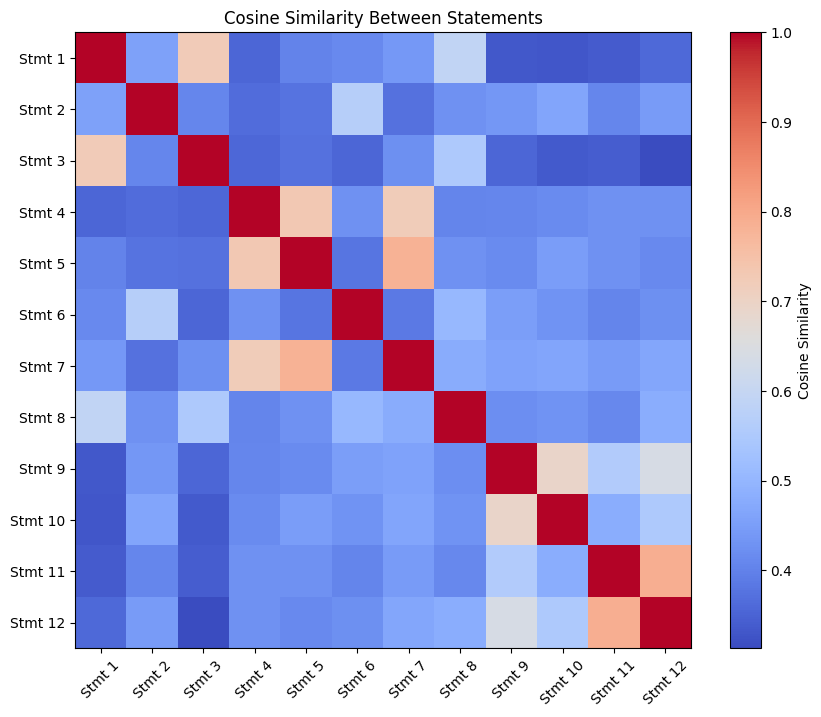

In [30]:
# Step 5: Visualize the similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.xticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))], rotation=45)
plt.yticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))])
plt.title("Cosine Similarity Between Statements")
plt.show()

In [27]:

# Step 6: Analyze relationships in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


In [28]:
reduced_embeddings

array([[-12.90405921,   1.19055508],
       [ -2.91069634,  -5.14010878],
       [-12.31733672,   1.35436666],
       [  5.18445371,  10.59730772],
       [  4.7001539 ,  11.5491347 ],
       [ -2.09170983,  -4.29079704],
       [  3.79814506,  10.29847662],
       [ -7.12596165,  -0.92072337],
       [  5.7450852 ,  -6.55217056],
       [  5.36722756,  -5.15970828],
       [  6.04517101,  -5.79102418],
       [  6.50952731,  -7.13530856]])

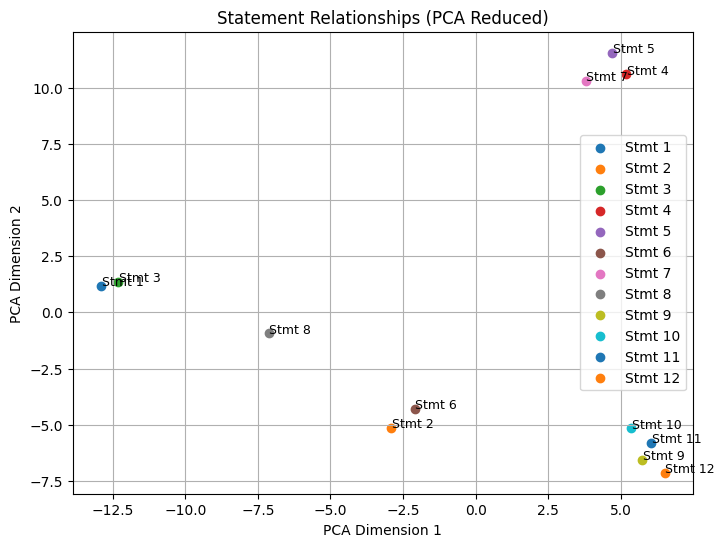

In [29]:

# Scatter plot to visualize relationships
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced_embeddings):
    plt.scatter(x, y, label=f"Stmt {i+1}")
    plt.text(x + 0.02, y, f"Stmt {i+1}", fontsize=9)

plt.title("Statement Relationships (PCA Reduced)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid()
plt.show()